In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Exclude dodgy images

In [4]:
import cv2

test_dir = 'data/test'
train_dir = 'data/train'
val_dir = 'data/val'

In [15]:
for image_class in os.listdir(test_dir):
    print(os.path.join(test_dir, image_class))
    for image in os.listdir(os.path.join(test_dir, image_class)):
        image_path = os.path.join(test_dir, image_class, image)
        try:
            cv2.imread(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

for image_class in os.listdir(train_dir):
    print(os.path.join(train_dir, image_class))
    for image in os.listdir(os.path.join(train_dir, image_class)):
        image_path = os.path.join(train_dir, image_class, image)
        try:
            cv2.imread(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

for image_class in os.listdir(val_dir):
    print(os.path.join(val_dir, image_class))
    for image in os.listdir(os.path.join(val_dir, image_class)):
        image_path = os.path.join(val_dir, image_class, image)
        try:
            cv2.imread(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

data/test/PNEUMONIA
data/test/NORMAL
data/train/PNEUMONIA


KeyboardInterrupt: 

In [5]:
import numpy as np

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data/train')

Found 5216 files belonging to 2 classes.
Metal device set to: Apple M2 Pro


2023-03-22 14:04:21.246230: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-22 14:04:21.246643: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
data_iterator

In [9]:
batch = data_iterator.next()

2023-03-22 14:04:24.152419: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [12]:
batch[0].shape

(32, 256, 256, 3)

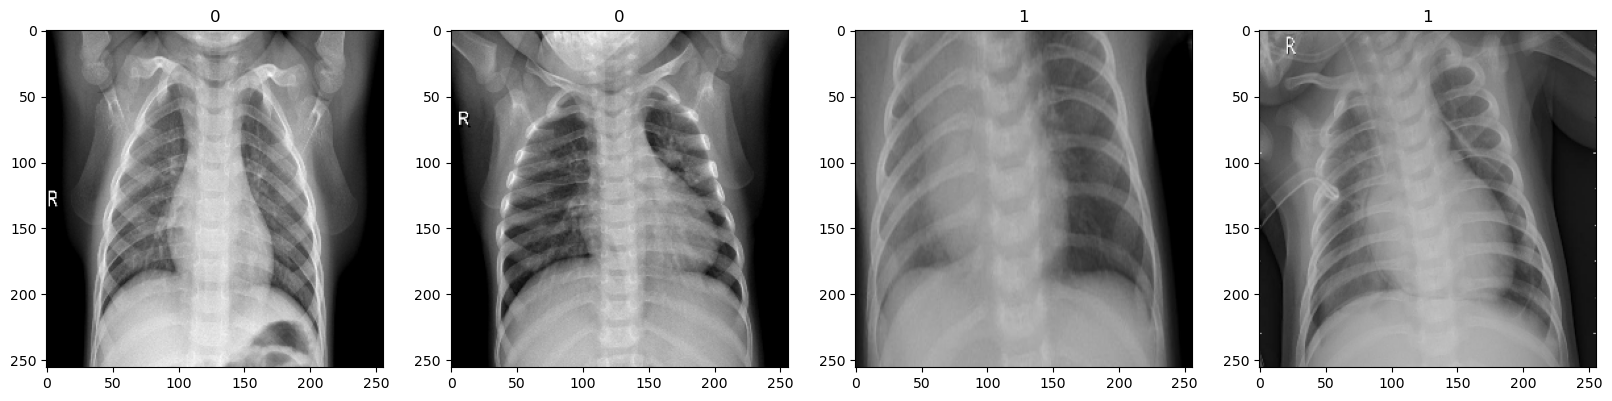

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocessing

In [23]:
data = data.map(lambda x, y: (x / 255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [27]:
data.as_numpy_iterator().next()[0].min()

0.0

In [28]:
print(type(data))

<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
